In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig   #--> eigen values and eigen vectors

In [5]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])
data=pd.DataFrame(data, columns=["col1","col2"])

In [6]:
data

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


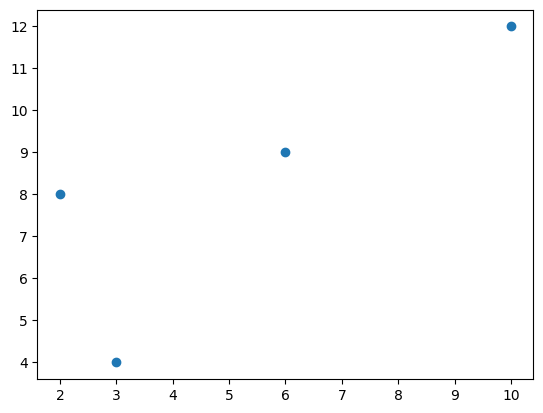

In [7]:
plt.scatter(data["col1"],data["col2"])

In [8]:
# The above is a 2d and we will try to plot a vector line and plot all the data points on it to make it 1-D
# fOR THIS, TO CREATE A VECTOR WE HAD TO KNOW THE COMPONENT

#STEPS OF PCA:
1. standardization of the data- standand normal distribution : using "standard s
2. cov matrix
3. eig value and eig vector
4. find the "principle component

In [9]:
mean_by_column=np.mean(data,axis=0)

In [10]:
std_by_column=np.std(data,axis=0)

In [11]:
scaled_by_mean=data-mean_by_column
scaled_by_mean

,col1,col2
0,-2.25,-4.25
1,-3.25,-0.25
2,0.75,0.75
3,4.75,3.75


In [12]:
scaled_data= scaled_by_mean/std_by_column

In [13]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [14]:
#The same process we can do by using "standard scaler"

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
scaler.fit_transform(data)  #getting the same output

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

STEP 2: Covariance Matrix
Relationship between the two variables(distance)



In [17]:
#cov matrix
cov_mat=np.cov(scaled_data.T)   #DIAGONAL VALES ARE SAME

STEP - 3: Eig value and eigen vectors

In [18]:
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [19]:
eig_val

array([2.40938985, 0.25727682])

In [20]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [21]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [22]:
# DOT PRODUCT OF "EIGEN VECTOR" AND "SCALED DATA"TO GET "PRINCIPAL COMPONENTS"

In [23]:
eig_vec.T.dot(scaled_data.T).T
# WE GET 2 PRINCIPAL CMPONENTS - COLUMN 1---> PC1 AND COUMN 2---->PC2

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [25]:
# We can perform this by using - scikit learn library
from sklearn.decomposition import PCA
pca=PCA()


In [26]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [27]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=["pc1","pc2"])

,pc1,pc2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [28]:
pca.inverse_transform(pca.fit_transform(scaled_data))
# By using this we can get my initial data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [29]:
# To get the percentage that how much percent of data is representedmmmmmm by the individual
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [30]:
0.90352119+0.09647881
#Total is 100% data

1.0

# PERFORMING PCA ON REAL WORLD DATA

In [78]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [79]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [80]:
# droping the 2 wo columns which are not necessary- ID number an "type of class)"

In [81]:
df=df.drop(['Id number','Type of glass'],axis=1)

In [82]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [84]:
# Standardize the data
scaled_df=scaler.fit_transform(df)

In [85]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

In [86]:
from sklearn.decomposition import PCA
pca=PCA()

In [87]:
pc_df=pca.fit_transform(scaled_df)

In [88]:
pc_dataframe=pd.DataFrame(data=pc_df)
pc_dataframe
# So, there are 9 principal components

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [93]:
var=pca.explained_variance_ratio_
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [90]:
max(var)

0.27901819179456466

In [91]:
min(var)

0.00017875753590172562

In [94]:
sum(var)

0.9999999999999999

In [95]:
sum_explained_variance_ratio = np.round(np.sum(pca.explained_variance_ratio_), 6)
print(sum_explained_variance_ratio)

1.0


In [96]:
sorted(var,reverse=True)

[0.27901819179456466,
 0.22778579831670417,
 0.1560937771094047,
 0.12865138291980238,
 0.10155580523615619,
 0.0586261325220868,
 0.04099538259055578,
 0.007094771974823585,
 0.00017875753590172562]

In [103]:
# I am checking for 6 PC data and we are representing 95% data and loosing 5 %
# We can take 7 principal components out of 9 and loosing very less data
sum(sorted(var,reverse=True)[:6])*100


95.17310878987189

In [101]:
# So, while taking 7 "exponential variance", we are getting 99% . So, we can take 7 componrnts
sum(sorted(var,reverse=True)[:7])

0.9927264704892746

<function matplotlib.pyplot.show(close=None, block=None)>

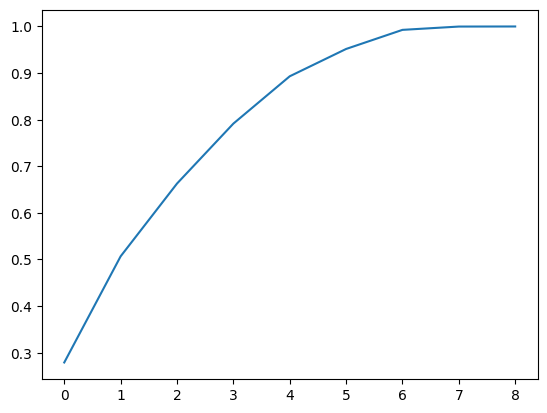

In [102]:
plt.plot(np.cumsum(var))   #cummulative sum
plt.show

In [104]:
pca2=PCA(n_components=6)

In [105]:
pca.fit_transform(pc_dataframe)

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [107]:
# Now, we will take 6 principal components and then give this to our ML Model
final_pca=pd.DataFrame(pca.fit_transform(pc_dataframe))
final_pca

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301
